# Tolerancing - Monte Carlo Simulations

In [1]:
from optiland.samples.objectives import CookeTriplet
from optiland.tolerancing.core import Tolerancing
from optiland.tolerancing.monte_carlo import MonteCarlo
from optiland.tolerancing.perturbation import DistributionSampler

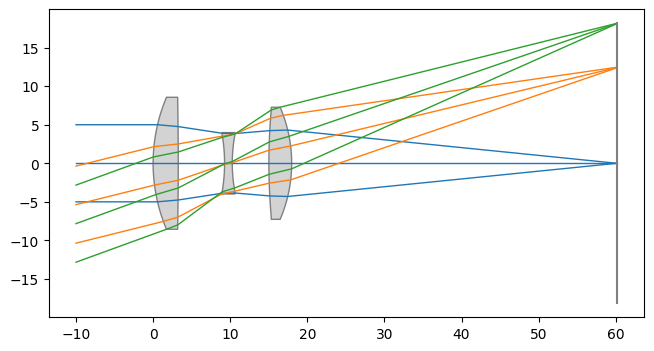

In [2]:
optic = CookeTriplet()
optic.draw()

In [3]:
tolerancing = Tolerancing(optic)

In [4]:
# loop through all surfaces and add perturbations
for k in range(1, 7):
    # X-tilt
    sampler = DistributionSampler("normal", loc=0, scale=0.01)
    tolerancing.add_perturbation("tilt", sampler, surface_number=k, axis="x")

    # Y-tilt
    sampler = DistributionSampler("normal", loc=0, scale=0.01)
    tolerancing.add_perturbation("tilt", sampler, surface_number=k, axis="y")

    # X-decenter
    sampler = DistributionSampler("normal", loc=0, scale=0.1)
    tolerancing.add_perturbation("decenter", sampler, surface_number=k, axis="x")

    # Y-decenter
    sampler = DistributionSampler("normal", loc=0, scale=0.1)
    tolerancing.add_perturbation("decenter", sampler, surface_number=k, axis="y")

Define operands:

In [ ]:
input_data = {
    "optic": optic,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 1,
    "wavelength": 0.55,
    "num_rays": 5,
}
tolerancing.add_operand("rms_spot_size", input_data, target=0)

input_data = {"optic": optic, "Hx": 0, "Hy": 1, "wavelength": 0.55, "num_rays": 5}
tolerancing.add_operand("OPD_difference", input_data)

input_data = {
    "optic": optic,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 1,
    "Px": 0,
    "Py": 0,
    "wavelength": 0.55,
}
tolerancing.add_operand("real_y_intercept", input_data)

In [6]:
monte_carlo = MonteCarlo(tolerancing)

In [7]:
monte_carlo.run(num_iterations=1000)

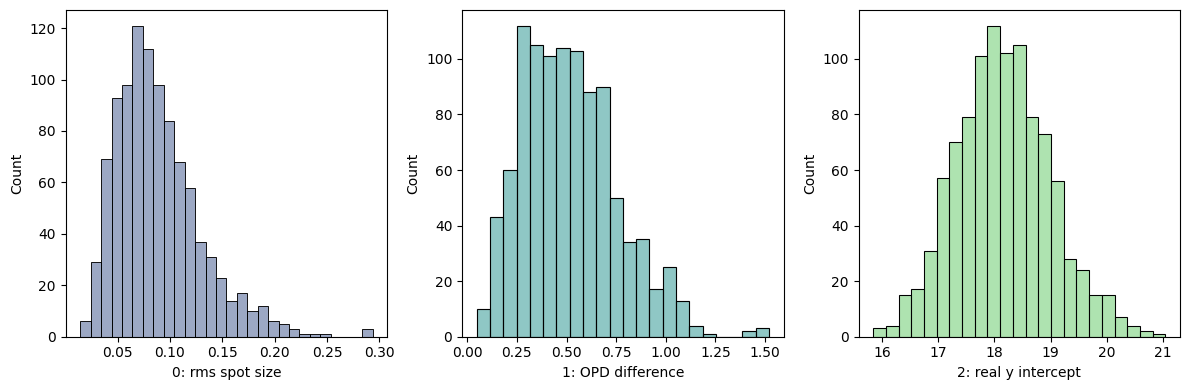

In [8]:
monte_carlo.view_histogram(kde=False)

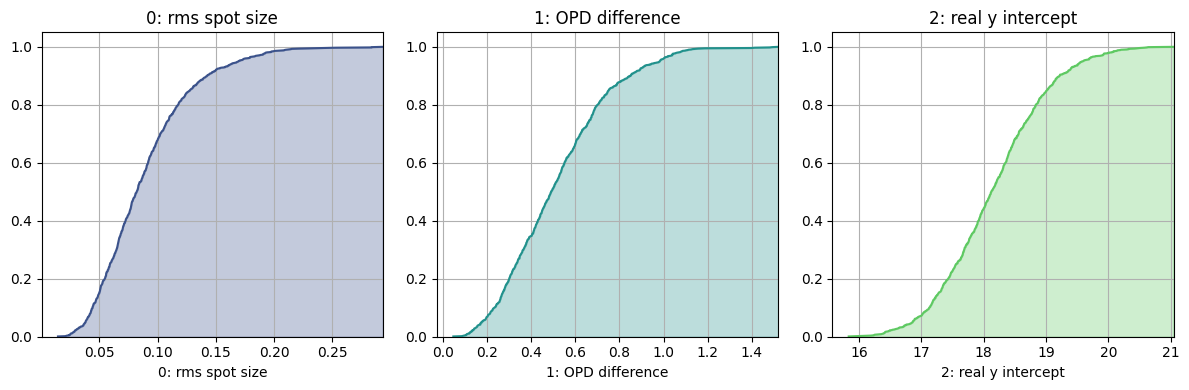

In [9]:
monte_carlo.view_cdf()

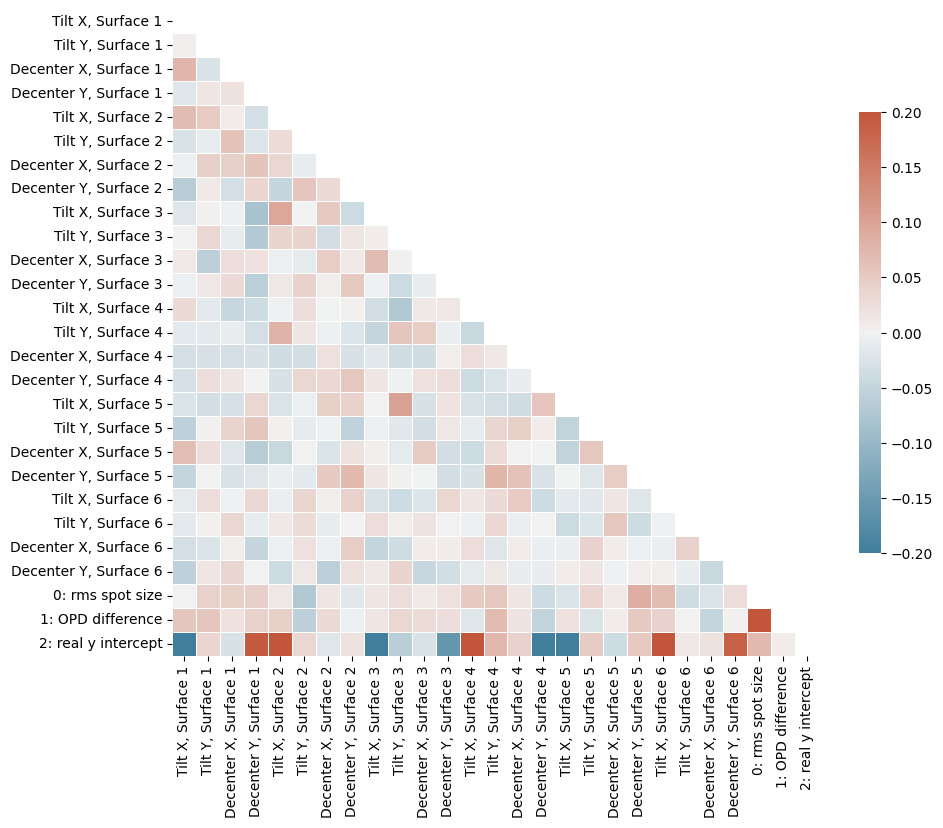

In [10]:
monte_carlo.view_heatmap(vmin=-0.2, vmax=0.2, figsize=(10, 10))

Get pandas dataframe:

In [11]:
df = monte_carlo.get_results()

In [12]:
df.head()

,"Tilt X, Surface 1","Tilt Y, Surface 1","Decenter X, Surface 1","Decenter Y, Surface 1","Tilt X, Surface 2","Tilt Y, Surface 2","Decenter X, Surface 2","Decenter Y, Surface 2","Tilt X, Surface 3","Tilt Y, Surface 3",...,"Tilt Y, Surface 5","Decenter X, Surface 5","Decenter Y, Surface 5","Tilt X, Surface 6","Tilt Y, Surface 6","Decenter X, Surface 6","Decenter Y, Surface 6",0: rms spot size,1: OPD difference,2: real y intercept
0,-0.001015,0.002997,-0.127951,-0.066370,-0.005958,0.014743,-0.070784,-0.240605,0.001648,-0.006904,...,0.002751,0.092850,0.158082,-0.019445,-0.005854,0.168591,-0.102832,0.124168,0.631540,17.847025
1,0.011508,-0.005211,0.041137,-0.004807,0.002889,-0.007792,0.046076,0.037662,0.003016,0.005415,...,-0.006646,0.130369,0.011208,0.000970,0.003864,-0.113458,-0.020629,0.041638,0.208169,18.190864
2,0.003466,-0.005655,0.000153,0.016753,-0.011799,0.009776,0.019892,-0.023183,-0.013899,0.005049,...,-0.000730,0.049114,0.069428,0.011433,0.002333,0.147592,-0.144352,0.075734,0.432374,18.077598
3,-0.000468,-0.005206,0.125718,0.059639,-0.001444,0.005054,0.163078,-0.087791,0.013155,0.016298,...,-0.021962,0.111031,0.002104,-0.009333,-0.021805,0.007142,0.119026,0.103463,0.985458,16.721414
4,0.014870,-0.001155,0.006523,0.063524,0.014476,0.004084,-0.067185,0.182418,0.004398,0.006592,...,-0.013695,0.100291,-0.141527,0.005009,-0.002089,-0.208956,0.132641,0.088565,0.533616,17.929629
